In [1]:
# First we have to import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
# Here we are going to import the first benign dataset fron 'data' folder
benign = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_benign.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Here we are going to import the first benign dataset fron 'data' folder
benign_2 = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-benign_1.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign_2['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Now we are going to import the first malicious dataset from 'data' folder
malicious = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_compressed.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 1 for all the rows
malicious['class'] = 1 # This is because we assume that all the data dns traffic in that dataset is malicious

# Now we are going to merge both the datasets
data_merged = pd.concat([benign, benign_2, malicious])

In [3]:
# To avoid bias we are going to shuffle the dataset
data = data_merged.sample(frac=1).reset_index(drop=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the longest_word column
data['longest_word'] = le.fit_transform(data['longest_word'])

# Encode the sld column
data['sld'] = le.fit_transform(data['sld'])

In [5]:
# Before splitting the dataset, we have to clean the dataset. 
# Firs we are going to remove the columns "longest_word" and "sld"
data = data.drop(['timestamp'], axis=1)

# Then lets remove NaN values from the dataset
data = data.dropna()

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,class
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,168,14,1,0
1,17,3,0,15,0,3.052909,2,3,10,5.000000,7496,14125,14,1,0
2,10,0,0,9,0,2.406304,1,2,6,4.500000,5232,21975,7,0,0
3,9,0,0,7,1,2.154135,1,2,5,4.000000,10189,22819,6,0,0
4,23,3,0,20,0,3.057798,3,3,15,7.000000,11297,11647,19,1,0


In [6]:
# Now lets split the dataset into training and testing data
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(data.describe())

          FQDN_count  subdomain_length          upper          lower  \
count  202831.000000     202831.000000  202831.000000  202831.000000   
mean       18.843722          4.112108       0.510987      10.852739   
std         6.928431          4.076035       3.851880       3.551985   
min         2.000000          0.000000       0.000000       0.000000   
25%        13.000000          0.000000       0.000000      10.000000   
50%        19.000000          3.000000       0.000000      10.000000   
75%        25.000000          8.000000       0.000000      12.000000   
max        36.000000         29.000000      32.000000      34.000000   

             numeric        entropy        special         labels  \
count  202831.000000  202831.000000  202831.000000  202831.000000   
mean        4.106631       2.468462       3.373365       3.885170   
std         4.708304       0.461948       2.304147       1.862196   
min         0.000000       0.219195       0.000000       1.000000   
25%   

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1920      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0458 - mae: 0.0964 - val_loss: 0.0448 - val_mae: 0.0931
Epoch 2/10
3550/3550 [==============================] - 5s 2ms/step - loss: 0.0452 - mae: 0.0925 - val_loss: 0.0448 - val_mae: 0.0979
Epoch 3/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0451 - mae: 0.0918 - val_loss: 0.0447 - val_mae: 0.0912
Epoch 4/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0450 - mae: 0.0915 - val_loss: 0.0447 - val_mae: 0.0913
Epoch 5/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0450 - mae: 0.0911 - val_loss: 0.0448 - val_mae: 0.0859
Epoch 6/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0450 - mae: 0.0910 - val_loss: 0.0447 - val_mae: 0.0902
Epoch 7/10
3550/3550 [==============================] - 6s 2ms/step - loss: 0.0450 - mae: 0.0913 - val_loss: 0.0448 - val_mae: 0.0853
Epoch 8/10
3550/3550 [==============================] - 6s 2ms

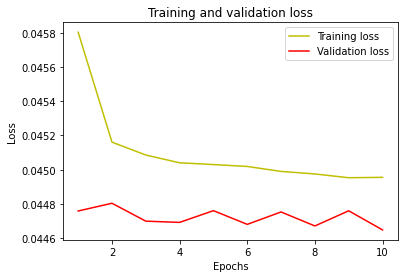

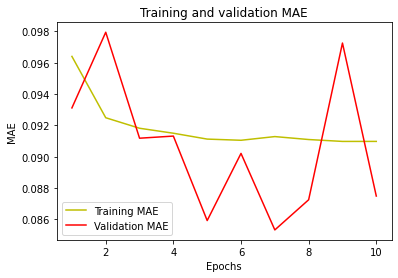

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [39]:
predictions = model.predict(X_test)
print(predictions[0:100])
print(y_test[0:100])

[[0.00239122]
 [0.00239104]
 [0.00244102]
 [0.00243786]
 [0.00239122]
 [0.00233608]
 [0.0023773 ]
 [0.00233608]
 [0.00233608]
 [0.00244102]
 [0.00238201]
 [0.00233608]
 [0.00239122]
 [0.00233608]
 [0.00233608]
 [0.00244102]
 [0.00239104]
 [0.00239104]
 [0.00244024]
 [0.00239104]
 [0.0023773 ]
 [0.00239122]
 [0.00237647]
 [0.00244102]
 [0.00239122]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00244024]
 [0.00233608]
 [0.00244102]
 [0.0023905 ]
 [0.00239122]
 [0.00239083]
 [0.00239101]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00243786]
 [0.00239122]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00239104]
 [0.00237647]
 [0.00244024]
 [0.00233608]
 [0.00244024]
 [0.00243786]
 [0.00244024]
 [0.00233608]
 [0.00244102]
 [0.00244102]
 [0.00239077]
 [0.00239104]
 [0.0023773 ]
 [0.00233608]
 [0.00244024]
 [0.00239104]
 [0.00233608]
 [0.00233608]
 [0.00233608]
 [0.00239122]
 [0.00233608]
 [0.00239122]
 [0.00233608]
 [0.00233608]
 [0.00

In [40]:
def get_packet_labels(predictions):
    """
    Returns a list of packet labels based on the given probability thresholds.

    Args:
    - predictions: list of tuples containing the predicted probabilities for each packet
    - threshold_1: probability threshold for assigning the "suspicious" label
    - threshold_2: probability threshold for assigning the "attack" label

    Returns:
    - list of packet labels (one of "benign", "suspicious", or "attack") for each packet
    """
    labels = []
    for p in predictions:
        if p == 0:
            labels.append('benign')
        elif p == 1:
            labels.append('attack')
        
    return labels

In [41]:
print(set(get_packet_labels(model.predict(X_test))))

set()


In [46]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier()
mlp.fit(X_train_scaled, y_train)

print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))


Training set score: 0.949507
Test set score: 0.949515


In [52]:
print(mlp.predict_proba(X_test_scaled))

[[8.94252170e-01 1.05747830e-01]
 [9.99999910e-01 8.96323524e-08]
 [8.78145795e-01 1.21854205e-01]
 ...
 [9.99902274e-01 9.77256985e-05]
 [9.99968313e-01 3.16867335e-05]
 [9.98690105e-01 1.30989534e-03]]
